In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns


## Предворительная обработка

In [2]:
df = pd.read_excel('C:/data.xlsx')
df = df.rename(columns={'Unnamed: 0': 'Ссылка'})
df = df.set_index('Ссылка')
df.head(5)

,Цена квартиры,Район,Время до метро (пешком),Общая площадь,Жилая площадь,Этаж,Этажей в доме,Год сдачи,Отделка,Высота потолков
Ссылка,,,,,,,,,,
https://www.cian.ru/sale/flat/287316997/,37031000,Хамовники,15,49.80,11.3,4,18.0,2026,Без отделки,3.25
https://www.cian.ru/sale/flat/284003619/,62100000,Левобережный,5,123.11,70.4,13,20.0,2022,Чистовая,3.30
https://www.cian.ru/sale/flat/286934990/,115883000,Хамовники,15,156.20,57.6,12,18.0,2026,Без отделки,3.25
https://www.cian.ru/sale/flat/281845936/,89354602,Пресненский,14,140.77,62.8,14,26.0,2025,Без отделки,3.10
https://www.cian.ru/sale/flat/286934993/,89915000,Хамовники,15,122.60,44.7,12,18.0,2026,Без отделки,3.25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, https://www.cian.ru/sale/flat/287316997/ to https://www.cian.ru/sale/flat/274079207/
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Цена квартиры            984 non-null    int64  
 1   Район                    984 non-null    object 
 2   Время до метро (пешком)  984 non-null    int64  
 3   Общая площадь            984 non-null    float64
 4   Жилая площадь            984 non-null    float64
 5   Этаж                     984 non-null    int64  
 6   Этажей в доме            974 non-null    float64
 7   Год сдачи                984 non-null    int64  
 8   Отделка                  984 non-null    object 
 9   Высота потолков          984 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 84.6+ KB


In [4]:
# В 10 строках переменная "Этажей в доме" имеет значение NaN. Выведем список таких квартир, перейдём по ссылкам и посмотрим,
# что с ними не так.

df.loc[df['Этажей в доме'].isnull()]

,Цена квартиры,Район,Время до метро (пешком),Общая площадь,Жилая площадь,Этаж,Этажей в доме,Год сдачи,Отделка,Высота потолков
Ссылка,,,,,,,,,,
https://www.cian.ru/sale/flat/268579037/,107835200,Арбат,4,111.4,50.8,12,NaN,6,Без отделки,3.2
https://www.cian.ru/sale/flat/268579035/,133420000,Арбат,4,140.0,67.8,14,NaN,6,Без отделки,3.2
https://www.cian.ru/sale/flat/268579027/,174494300,Арбат,5,183.1,92.8,21,NaN,5,Без отделки,3.2
https://www.cian.ru/sale/flat/268579028/,178149600,Арбат,5,181.6,77.7,20,NaN,5,Без отделки,3.2
https://www.cian.ru/sale/flat/268579032/,101191500,Арбат,5,101.7,51.2,13,NaN,6,Без отделки,3.0
https://www.cian.ru/sale/flat/268579031/,90726400,Арбат,5,102.4,51.2,13,NaN,6,Без отделки,3.0
https://www.cian.ru/sale/flat/268579036/,104544100,Арбат,4,109.7,48.9,12,NaN,6,Без отделки,3.2
https://www.cian.ru/sale/flat/268579035/,133420000,Арбат,4,140.0,67.8,14,NaN,6,Без отделки,3.2
https://www.cian.ru/sale/flat/268579027/,174494300,Арбат,5,183.1,92.8,21,NaN,5,Без отделки,3.2


In [5]:
# Все эти квартиры являются частью ЖК «De Luxe квартал апартаментов «Театральный Дом»». Они имеют немного иную html-разметку,
# (поэтому год сдачи отображается неадекватно, а этажность не соотвествует действительности), поэтому криво спарсились. Просто 
# удалим их.

df = df.dropna(subset=['Этажей в доме'])

In [6]:
# Названия переменных полно и чётко отражают их описание.

## Визуализация

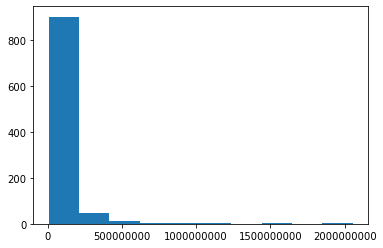

In [52]:
# В целевой переменной (цена квартиры) есть выбросы, надо подумать, как с ними бороться.

plt.hist(df['Цена квартиры'])
plt.ticklabel_format(style='plain', axis='x')

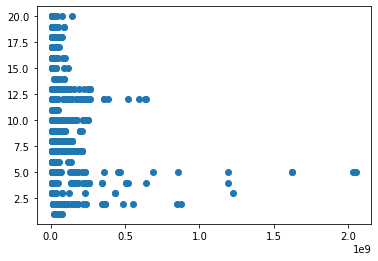

In [57]:
# Вряд ли между ценой квартиры и временем до метро есть связь
plt.scatter(df['Цена квартиры'], df['Время до метро (пешком)'])

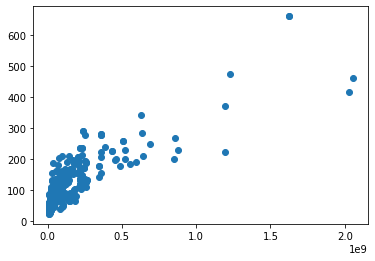

In [58]:
# Прослеживается, что между ценой квартиры и общей площадью есть какая-то линейная связь
plt.scatter(df['Цена квартиры'], df['Общая площадь'])

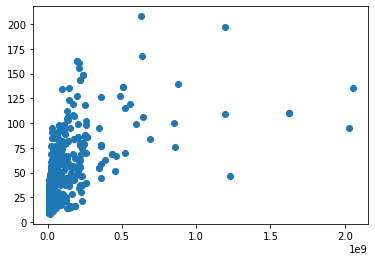

In [59]:
plt.scatter(df['Цена квартиры'], df['Жилая площадь'])

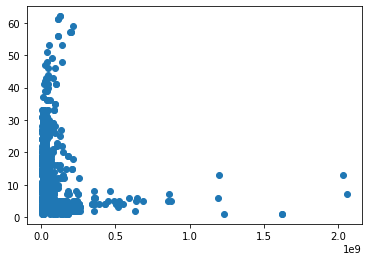

In [60]:
plt.scatter(df['Цена квартиры'], df['Этаж'])

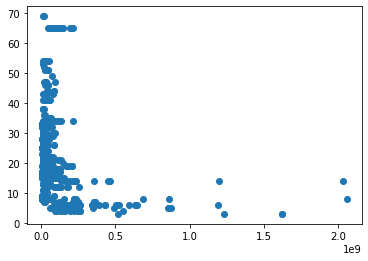

In [61]:
plt.scatter(df['Цена квартиры'], df['Этажей в доме'])

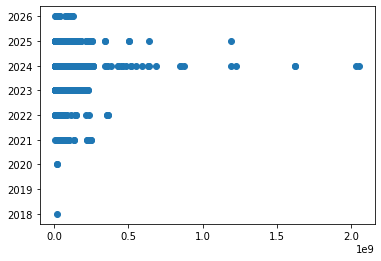

In [62]:
plt.scatter(df['Цена квартиры'], df['Год сдачи'])

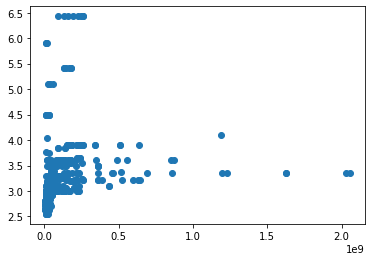

In [63]:
plt.scatter(df['Цена квартиры'], df['Высота потолков'])

In [66]:
# Создаётся ощущение, что стоит попытаться избавиться от выбросов и провести визуализацию ещё раз. На данный момент
# Видна связь лишь между ценой квартиры и общей площадью.

In [ ]:
# Далее в проекте я планирую построить модель регрессии, которая сможет предсказывать стоимость квартиры по прочим параметрам.